In [2]:
import pickle
import json
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
from collections import Counter
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from itertools import combinations
from nltk.tokenize import RegexpTokenizer
from collections import OrderedDict

In [3]:
with open('../finalData//UncleandiseaseData.json') as json_file:
    result_dict = json.load(json_file)
print("total diseases:",len(result_dict.keys()))

total diseases: 583


In [4]:
## sort data
temp_dict=dict()
for disease in sorted(result_dict.keys()):
     temp_dict[disease]=result_dict[disease]
result_dict=temp_dict.copy()

In [5]:
def write():
    with open("../finalData/finalDisease.json", "w") as outfile: 
            json.dump(result_dict, outfile)

# Data Cleaning

# Removing diseases with common data

In [6]:
completedlist=[]
comparedict=dict()
for disease1,data1 in result_dict.items():
    for disease2,data2 in result_dict.items():
        if disease1==disease2:
            continue
        if data1==data2:
            if disease1 in completedlist:
                continue
            if disease1 in comparedict:
                comparedict[disease1].append(disease2)
            else:
                comparedict[disease1]=[disease2]
            completedlist.append(disease2)
        else:
            continue
if len(comparedict)==0:
    print("no duplicates found")
else:
    for parent,child in comparedict.items():
        print(parent,"-->",","+str(child)[1:-1])
    print("these are the duplicates found")

no duplicates found


## check if all keys are present

In [7]:
count=0
for disease,data in result_dict.items():
    if len(data)!=9:
        count+=1
        print(disease)
if count==0:
    print("all keys are present in data")
else:
    print("some keys are missing in the above diseases")

all keys are present in data


# Data Understanding

In [8]:
keys=['extraName', 'diagnoseType', 'symptomDescription', 'symptoms', 'occurance', 'overview', 'notes', 'treatments', 'specialists']

# observing occurance of disease

In [9]:
occurance_count=dict()
for disease,data in result_dict.items():
    occurance=data['occurance']
    if occurance in occurance_count:
        occurance_count[occurance]+=1
    else:
        occurance_count[occurance]=1
occurance_count

{'Common': 206,
 'Very common': 149,
 'Rare': 139,
 'Very rare': 52,
 'Extremely rare': 37}

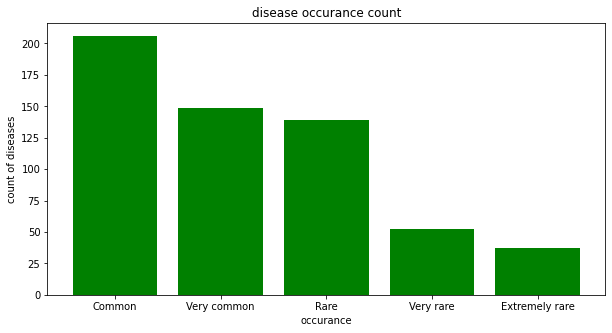

In [10]:
diseases = list(occurance_count.keys())
count = list(occurance_count.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(diseases, count, color ='green')
plt.xlabel("occurance")
plt.ylabel("count of diseases")
plt.title("disease occurance count")
plt.show()

   ```
   Very Common - More than 10 million cases per year (India)
        Common - More than 1 million cases per year (India)
          Rare - Fewer than 1 million cases per year (India)
     Very Rare - Fewer than 100 thousand cases per year (India) 
Extremely Rare - Fewer than 5 thousand cases per year (India)
   ```

## Removing disease very rare and extremely rare diseases

In [12]:
remove_occurance=["Very rare","Extremely rare"]
remove_disease_list=list()
for disease,data in result_dict.items():
    occurance=data['occurance']
    if occurance in remove_occurance:
#         print(disease,"--->",occurance)
        remove_disease_list.append(disease)
print("deleting",len(remove_disease_list),"diseases\n")
for disease in remove_disease_list:
    del result_dict[disease]
print("total diseases:",len(result_dict.keys()))

deleting 89 diseases

total diseases: 494


# Observing diagnoseType of disease

In [13]:
diagnoseType_count=dict()
for disease,data in result_dict.items():
    diagnoseType=data['diagnoseType']
    #removing empty diagnosis with 
    if diagnoseType=="":
        data['diagnoseType']='Requires a medical diagnosis'
        diagnoseType=data['diagnoseType']
    if diagnoseType in diagnoseType_count:
        diagnoseType_count[diagnoseType]+=1
    else:
        diagnoseType_count[diagnoseType]=1
diagnoseType_count

{'Requires a medical diagnosis': 377, 'Usually self-diagnosable': 117}

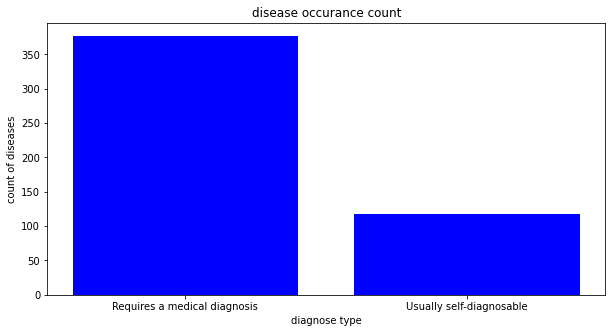

In [14]:
diseases = list(diagnoseType_count.keys())
count = list(diagnoseType_count.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(diseases, count, color ='blue')
plt.xlabel("diagnose type")
plt.ylabel("count of diseases")
plt.title("disease occurance count")
plt.show()

In [15]:
write()